### **Case study on unsupervised learning**

In [22]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Loading the dataset
df = pd.read_csv("/content/Wine_clust .csv")
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [ ]:
df.tail()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     OD280  Proline  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560

In [ ]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [ ]:
df.shape

(178, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
# Finding Null Values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
df.corr()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.072343   -0.368710  0.003911     -0.276769   0.066004   
Proline               0.643720   -0.192011  0.223626     -0.440597   0.393351   

                      Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
Alcohol                    0.289101    0.236815             -0.155929   
Malic_Acid                -0.335167   -0.411007              0.292977   
Ash                        0.128980    0.115077              0.186230   
Ash_Alcanity              -0.321113   -0.351370              0.361922   
Magnesium                  0.214401    0.195784             -0.256294   
Total_Phenols              1.000000    0.864564             -0.449935   
Flavanoids                 0.864564    1.000000             -0.537900   
Nonflavanoid_Phenols      -0.449935   -0.537900              1.000000   
Proanthocyanins            0.612413    0.652692             -0.365845   
Color_Intensity           -0.055136   -0.172379              0.139057   
Hue                        0.433681    0.543479             -0.262640   
OD280                      0.699949    0.787194             -0.503270   
Proline                    0.498115    0.494193             -0.311385   

                      Proanthocyanins  Color_Intensity       Hue     OD280  \
Alcohol                      0.136698         0.546364 -0.071747  0.072343   
Malic_Acid                  -0.220746         0.248985 -0.561296 -0.368710   
Ash                          0.009652         0.258887 -0.074667  0.003911   
Ash_Alcanity                -0.197327         0.018732 -0.273955 -0.276769   
Magnesium                    0.236441         0.199950  0.055398  0.066004   
Total_Phenols                0.612413        -0.055136  0.433681  0.699949   
Flavanoids                   0.652692        -0.172379  0.543479  0.787194   
Nonflavanoid_Phenols        -0.365845         0.139057 -0.262640 -0.503270   
Proanthocyanins              1.000000        -0.025250  0.295544  0.519067   
Color_Intensity             -0.025250         1.000000 -0.521813 -0.428815   
Hue                          0.295544        -0.521813  1.000000  0.565468   
OD280                        0.519067        -0.428815  0.565468  1.000000   
Proline                      0.330417         0.316100  0.236183  0.312761   

                       Proline  
Alcohol               0.643720  
Malic_Acid           -0.192011  
Ash                   0.223626  
Ash_Alcanity         -0.440597  
Magnesium             0.393351  
Total_Phenols         0.498115  
Flavanoids            0.494193  
Nonflavanoid_Phenols -0.311385  
Proanthocyanins       0.330417  
Color_Intensity       0.316100  
Hue                   0.236183  
OD280                 0.312761  
Proline               1.000000

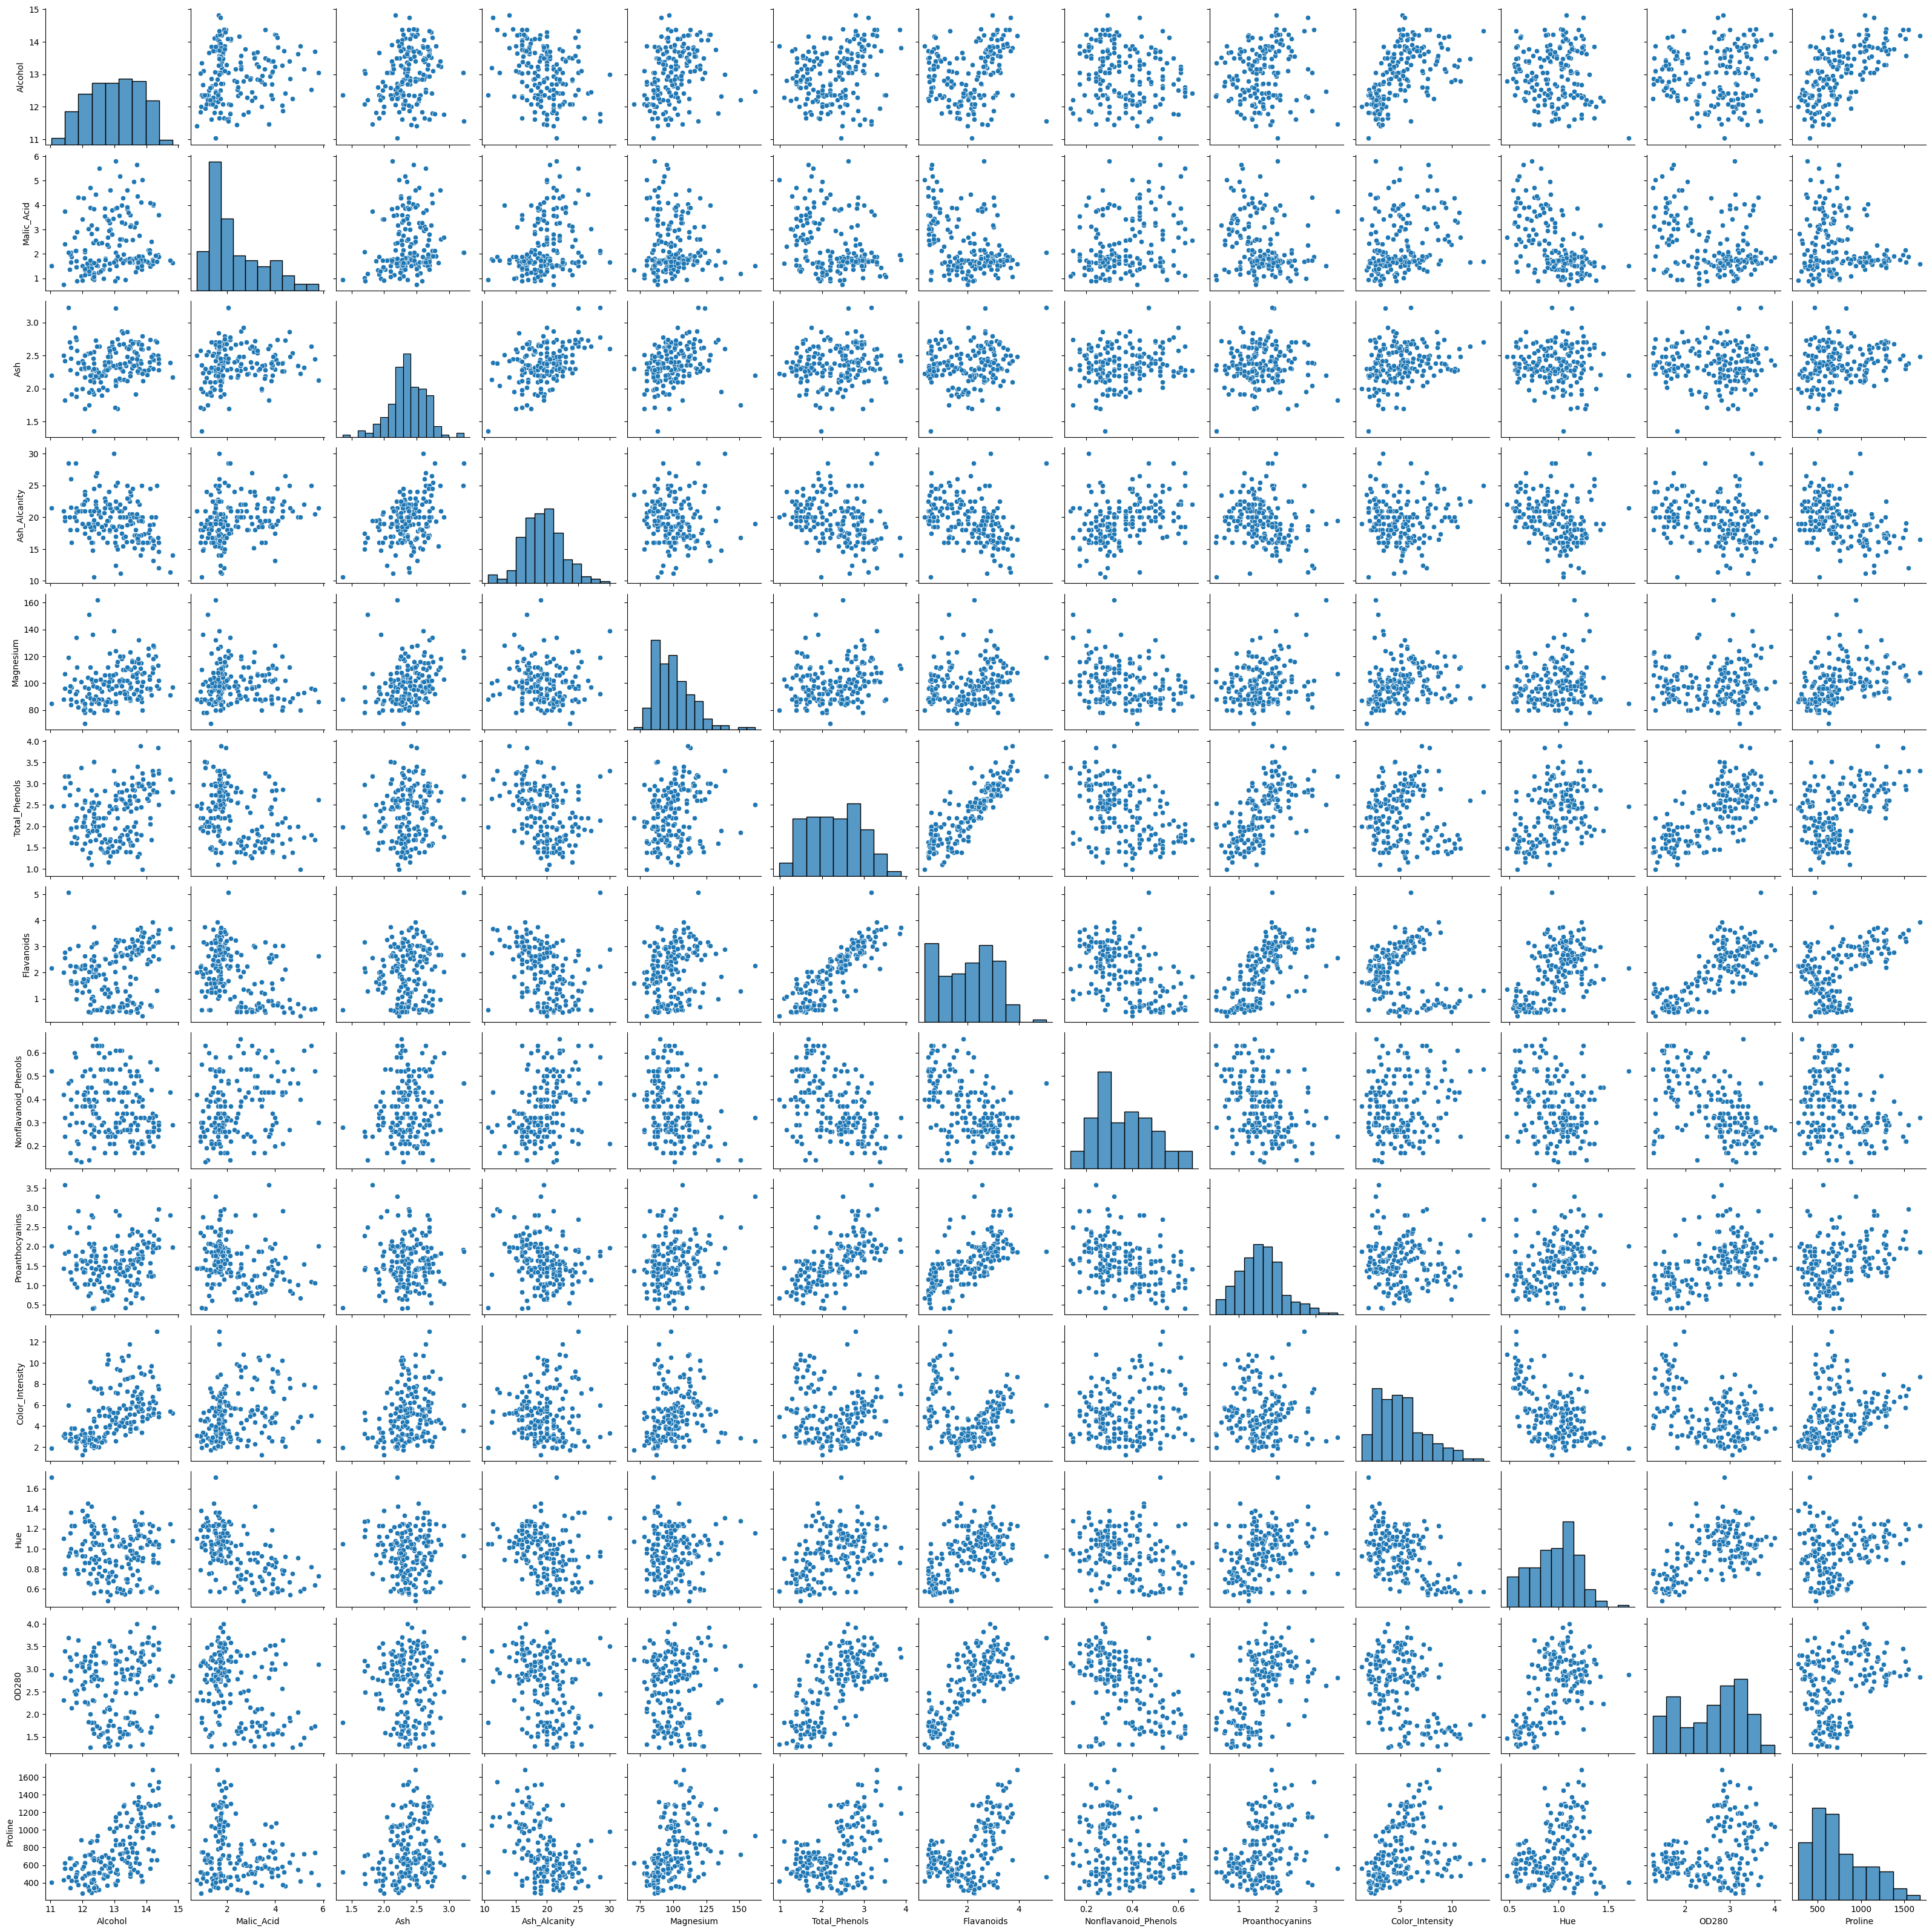

In [ ]:
# Ploting all the scatter matrix pairs in a single plot
sns.pairplot(df)

 For some of the features, the distribution appears to be fairly linear. For some others, the distribution appears to be negatively skewed.
There are indeed some interesting co-dependencies between some of the features.

Outliers Detection

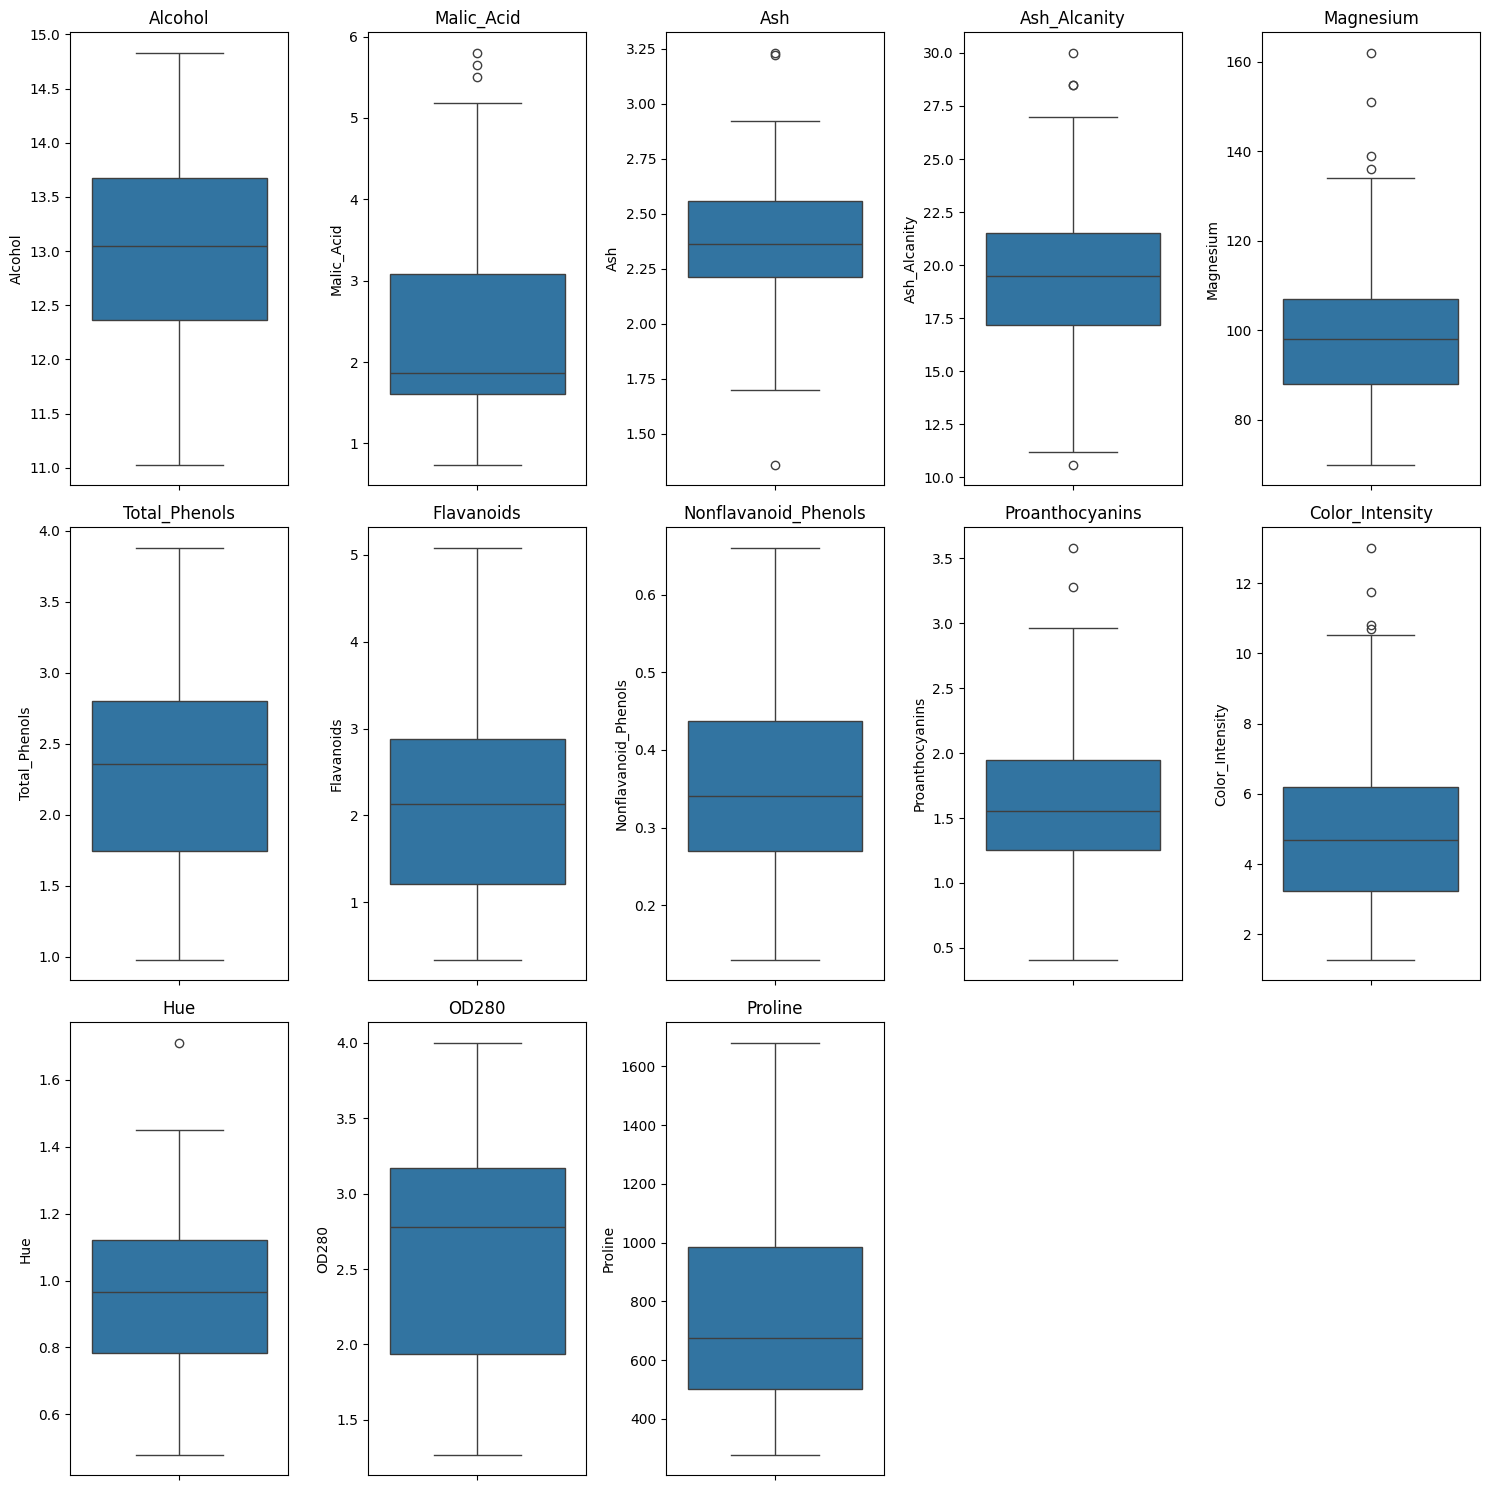

In [36]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(df.columns):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Calculating outliers

In [37]:
def IQR_OutlierRemoval(new_df):
    Q1 = new_df.quantile(0.25)
    Q3 = new_df.quantile(0.75)
    IQR = Q3 - Q1

    new_df = new_df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return new_df
    # plt.show()

df2 = df.copy()

print(df2.shape)

(178, 13)


In [38]:
df2 = IQR_OutlierRemoval(df2) #outlier removal
df2.shape

(161, 13)

Boxplot after outlier removal

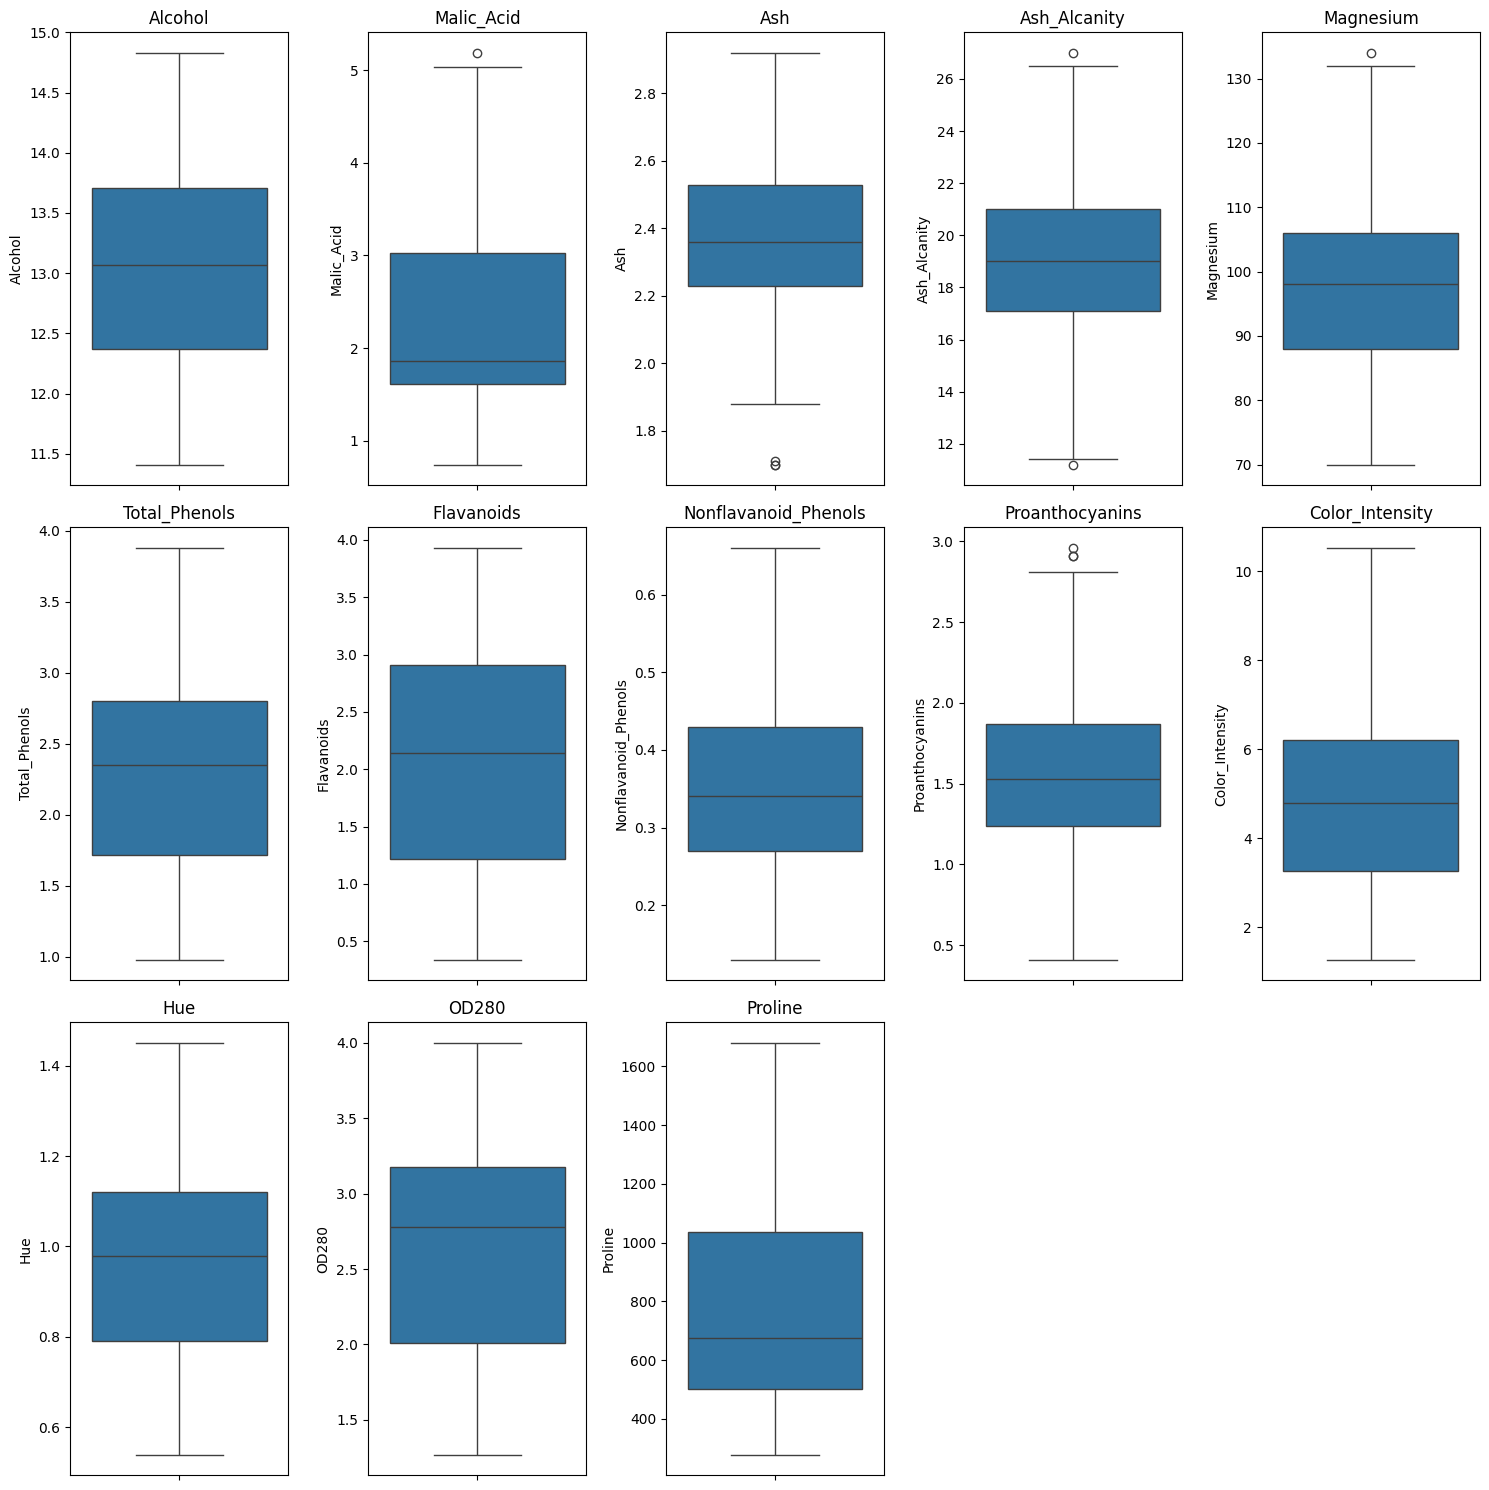

In [39]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(df2.columns):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data=df2[column])
    plt.title(column)

plt.tight_layout()
plt.show()

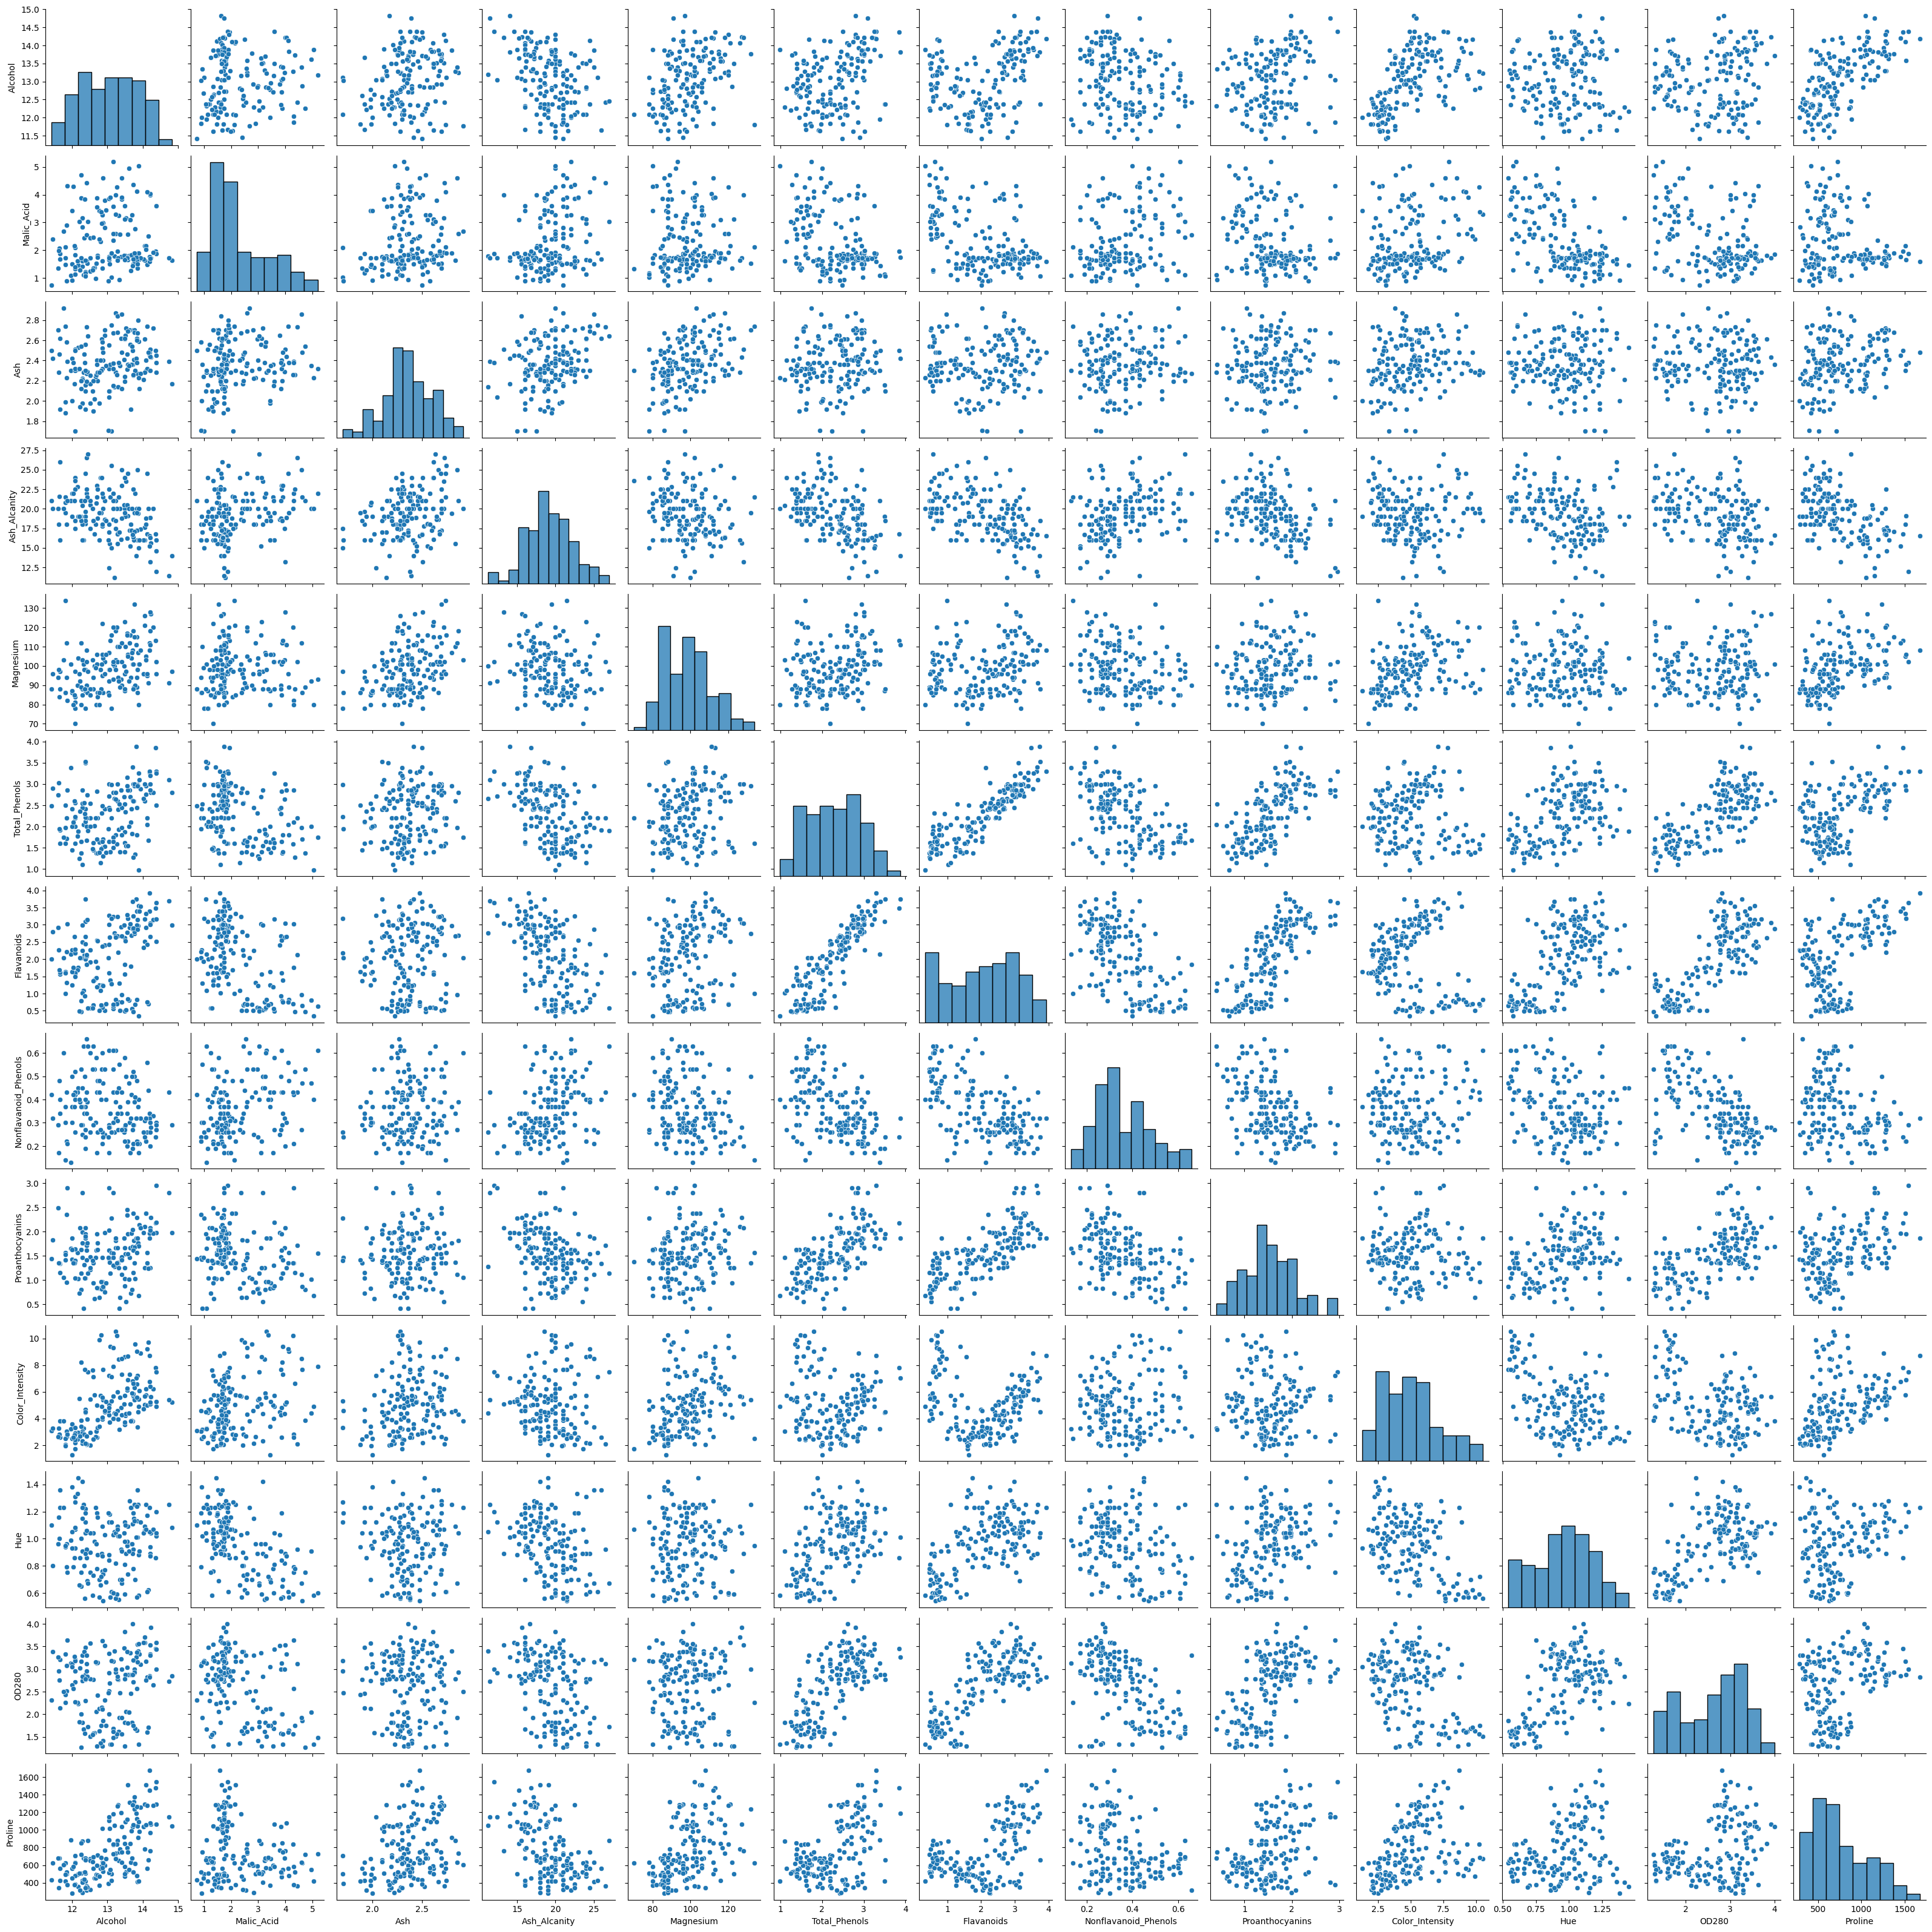

In [40]:
sns.pairplot(df2)
plt.show()

In [41]:
# checking the skewness of the features
df2.skew()

Alcohol                -0.031847
Malic_Acid              0.893988
Ash                    -0.215661
Ash_Alcanity            0.032577
Magnesium               0.498408
Total_Phenols           0.082184
Flavanoids             -0.131770
Nonflavanoid_Phenols    0.518631
Proanthocyanins         0.329645
Color_Intensity         0.623476
Hue                    -0.140952
OD280                  -0.360417
Proline                 0.697792
dtype: float64

1. Symmetric or approximately symmetric distributions:
"Alcohol", "Total_Phenols", "Flavanoids", and "Hue" have skewness values close to 0, indicating that their distributions are nearly symmetric.
2. Right-skewed distributions:
"Malic_Acid", "Magnesium", "Nonflavanoid_Phenols", "Proanthocyanins", "Color_Intensity", and "Proline" have positive skewness values.
3. Left-skewed distributions:
"Ash" and "OD280" have slightly negative skewness values, although the skewness is close to 0.

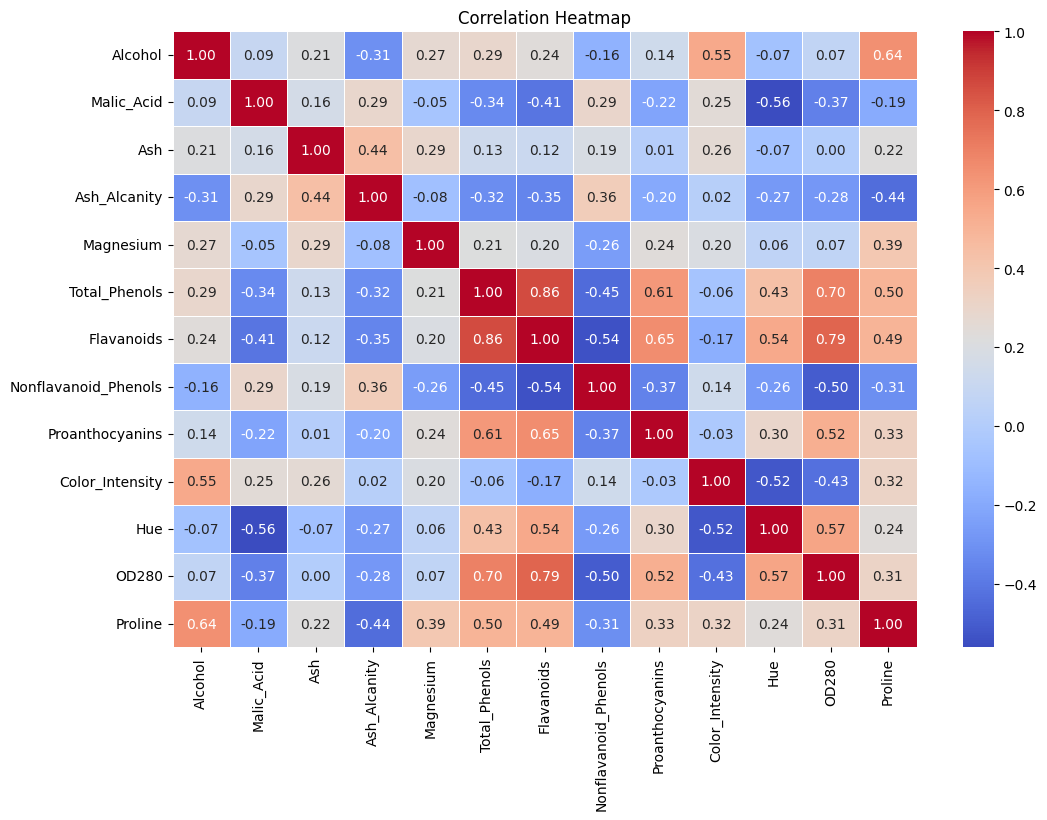

In [42]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

There seems to be a linear correlation (either positive or negative) between several features:

Total_Phenols and Flavanoids

*   Flavanoids and OD280
*   Total_Phenols and OD280
*   Flavanoids and Proanthocyanins
*   OD280 and Total_Phenols

In [43]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df2)

In [45]:
# Creating a DataFrame with the scaled values
scaled_df = pd.DataFrame(scaled_data, columns=df2.columns)
scaled_df.describe()

Alcohol    Malic_Acid           Ash  Ash_Alcanity     Magnesium  \
count  1.610000e+02  1.610000e+02  1.610000e+02  1.610000e+02  1.610000e+02   
mean  -3.971978e-16 -4.413309e-17  1.820490e-16  2.206654e-16 -1.765324e-16   
std    1.003120e+00  1.003120e+00  1.003120e+00  1.003120e+00  1.003120e+00   
min   -2.049857e+00 -1.499357e+00 -2.758493e+00 -2.672685e+00 -2.314802e+00   
25%   -8.428553e-01 -6.668235e-01 -5.543333e-01 -7.095058e-01 -8.545719e-01   
50%    3.725025e-02 -4.275897e-01 -1.369043e-02 -7.729542e-02 -4.333325e-02   
75%    8.419182e-01  6.920248e-01  6.933041e-01  5.881892e-01  6.056577e-01   
max    2.250087e+00  2.759005e+00  2.315233e+00  2.584643e+00  2.877126e+00   

       Total_Phenols    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count   1.610000e+02  1.610000e+02            161.000000     1.610000e+02   
mean    3.530647e-16  8.826618e-17              0.000000    -1.323993e-16   
std     1.003120e+00  1.003120e+00              1.003120     1.003120e+00   
min    -2.078638e+00 -1.733988e+00             -1.878728    -2.170971e+00   
25%    -9.047796e-01 -8.383905e-01             -0.725814    -5.876775e-01   
50%     9.458657e-02  9.791652e-02             -0.149357    -3.447866e-02   
75%     8.084196e-01  8.815648e-01              0.591802     6.140993e-01   
max     2.521619e+00  1.919644e+00              2.485875     2.693364e+00   

       Color_Intensity         Hue         OD280       Proline  
count     1.610000e+02  161.000000  1.610000e+02  1.610000e+02  
mean     -9.654113e-18    0.000000 -1.765324e-16  1.323993e-16  
std       1.003120e+00    1.003120  1.003120e+00  1.003120e+00  
min      -1.769080e+00   -1.928064 -1.922370e+00 -1.490160e+00  
25%      -8.263062e-01   -0.777958 -8.754661e-01 -7.963592e-01  
50%      -1.014602e-01    0.096123  2.138798e-01 -2.605217e-01  
75%       5.617976e-01    0.740183  7.797738e-01  8.545158e-01  
max       2.608422e+00    2.258323  1.939856e+00  2.852291e+00

## **Clustering Models**

### **K-Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

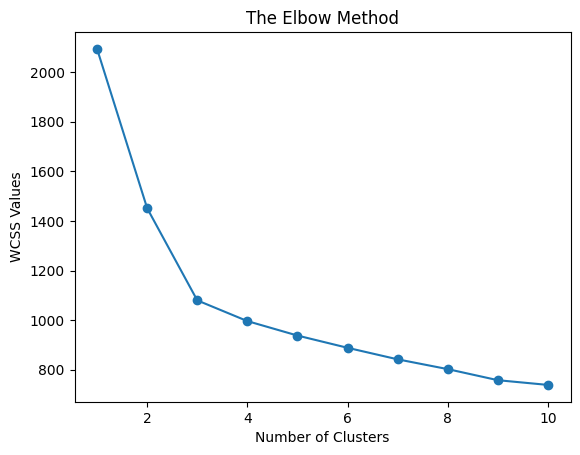

In [46]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state= 42)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)
plt.plot (range(1,11),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.show()

In [47]:
# k-means model with cluster 3
kmeans = KMeans(n_clusters = 3,init = 'k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(scaled_df)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [48]:
from sklearn.metrics import silhouette_score
silhouette_avg1 = silhouette_score(scaled_df, y_kmeans)
silhouette_avg1

0.3010147337033009

###  **K-means with PCA**

In [49]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_df)
pca

PCA()

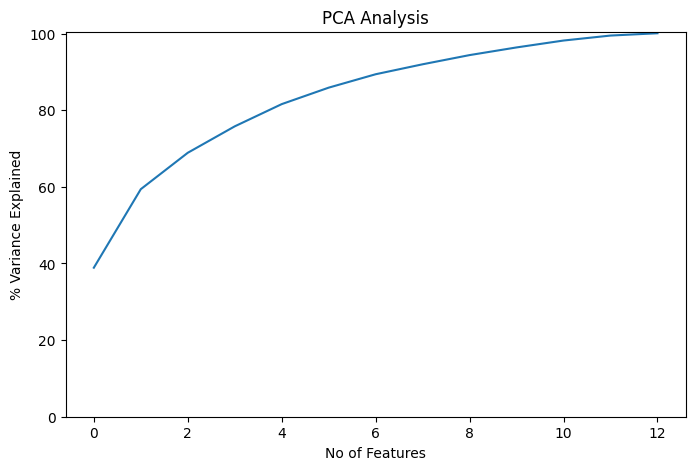

In [50]:
#pca.fit(scaled_data)
variance = pca.explained_variance_ratio_
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(8,5))
plt.ylabel('% Variance Explained')
plt.xlabel('No of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)
plt.show()

In [51]:
pca  = PCA(n_components= 2)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)
kmeans2 = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans2 = kmeans2.fit_predict(pca_df)
y_kmeans2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [52]:
silhouette_avg2 = silhouette_score(pca_df, y_kmeans2)
silhouette_avg2

0.5720028903237931

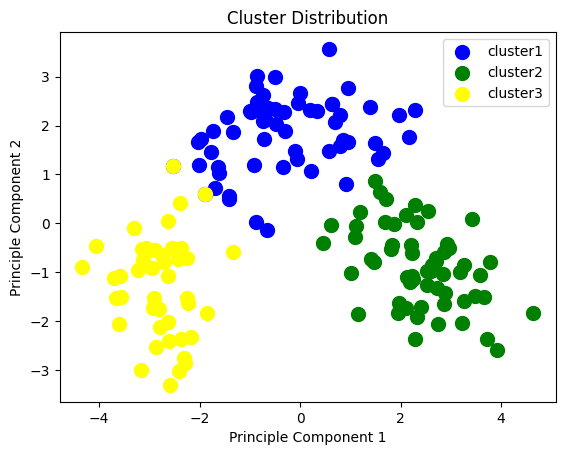

In [69]:
# plotting clusters
plt.scatter(pca_df[y_kmeans2 == 0,0], pca_df[y_kmeans2 == 0,1], s = 100, c = 'blue', label = 'cluster1')
plt.scatter(pca_df[y_kmeans == 1,0], pca_df[y_kmeans == 1,1], s = 100, c = 'green', label = 'cluster2')
plt.scatter(pca_df[y_kmeans == 2,0], pca_df[y_kmeans == 2,1], s = 100, c = 'yellow', label = 'cluster3')
plt.title('Cluster Distribution')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.legend()
plt.show()

### **Agglomerative Hierarchical Clustering**

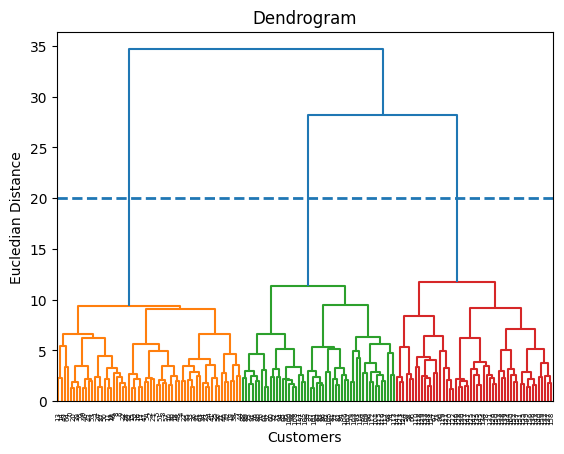

In [54]:
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(scaled_df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian Distance')
plt.hlines(y=20,xmin=0,xmax=2000,lw=2,linestyles='--')

the optimum number of clusters is 3

In [55]:
# model building
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters= 3, metric = 'euclidean',  linkage ='ward')
y_hc = hc.fit_predict(scaled_df)

In [56]:
silhouette_avg3 = silhouette_score(scaled_df, y_hc)
silhouette_avg3

0.2926994028296366

### **Agglomerative Hierarchical Clustering with PCA.**

In [57]:
pca  = PCA(n_components= 2)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)
hc2 = AgglomerativeClustering(n_clusters=3, metric ='euclidean',linkage='ward')
y_hc2 = hc2.fit_predict(pca_df)
silhouette_avg4 = silhouette_score(pca_df, y_hc2)
silhouette_avg4

0.5362232560720852

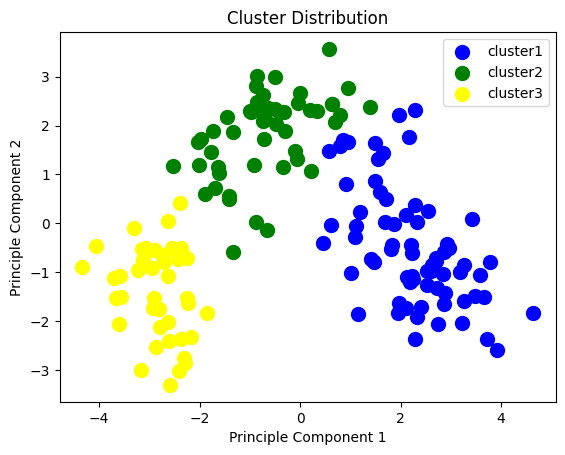

In [70]:
# plotting clusters
plt.scatter(pca_df[y_hc2 == 0,0], pca_df[y_hc2 == 0,1], s = 100, c = 'blue', label = 'cluster1')
plt.scatter(pca_df[y_hc2 == 1,0], pca_df[y_hc2 == 1,1], s = 100, c = 'green', label = 'cluster2')
plt.scatter(pca_df[y_hc2 == 2,0], pca_df[y_hc2 == 2,1], s = 100, c = 'yellow', label = 'cluster3')
plt.title('Cluster Distribution')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.legend()
plt.show()

### **DBScan Clustering**

In [60]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
y_dbscan = dbscan.fit_predict(scaled_df)
silhouette_avg5 = silhouette_score(scaled_df, y_dbscan)
silhouette_avg5

0.1577296367906252

In [61]:
pca  = PCA(n_components= 2)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)
dbscan2= DBSCAN(eps=3, min_samples=5)
y_dbscan2 = dbscan.fit_predict(pca_df)

silhouette_avg6 = silhouette_score(pca_df, y_hc2)
silhouette_avg6

0.5362232560720852

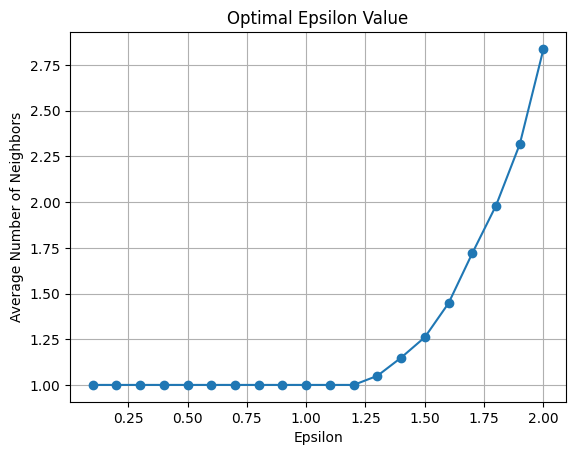

In [62]:
from sklearn.neighbors import NearestNeighbors

# Choosing a range of epsilon values
eps_values = np.linspace(0.1, 2.0, 20)

# Computing the number of neighbors within each epsilon radius
num_neighbors = []
for eps in eps_values:
    nbrs = NearestNeighbors(n_neighbors=len(scaled_df), metric='euclidean', algorithm='ball_tree', n_jobs=-1)
    nbrs.fit(scaled_df)
    distances, _ = nbrs.kneighbors(scaled_df)
    num_neighbors.append(np.sum(distances < eps, axis=1))

# Calculating the average number of neighbors
avg_num_neighbors = np.mean(num_neighbors, axis=1)

# Ploting epsilon values vs. average number of neighbors
plt.plot(eps_values, avg_num_neighbors, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Average Number of Neighbors')
plt.title('Optimal Epsilon Value')
plt.grid(True)
plt.show()

the optimum value for epsilon is taken as 1.3.

In [65]:
unique_labels = np.unique(y_db)
print(f"Number of unique labels: {len(unique_labels)}")

Number of unique labels: 1


In [66]:
# Increase the `min_samples` parameter to reduce the number of clusters
dbscan = DBSCAN(eps=1.3, min_samples=20)
y_db = dbscan.fit_predict(pca_df)

# Recalculate the silhouette score
silhouette_avg7 = silhouette_score(pca_df, y_db)

In [67]:
unique_labels = np.unique(y_db)
print(f"Number of unique labels: {len(unique_labels)}")
print(f"Silhouette score: {silhouette_avg7}")

Number of unique labels: 2
Silhouette score: -0.22998312504619373


In [68]:
#Creating dataframe with silhouette_scores
score={'Clustering Model':['K-Means','ACH','DBSCAN',],'Silhouette score without PCA':[silhouette_avg1,silhouette_avg3,silhouette_avg5],'Silhouette score with PCA':[silhouette_avg2,silhouette_avg4,silhouette_avg6]}
df=pd.DataFrame(score)
df.set_index('Clustering Model', inplace=True)
df

Silhouette score without PCA  Silhouette score with PCA
Clustering Model                                                         
K-Means                               0.301015                   0.572003
ACH                                   0.292699                   0.536223
DBSCAN                                0.157730                   0.536223

Comparing without and with PCA, it seems that applying PCA has generally improved the silhouette scores for all clustering models.
K-Means shows the highest improvement in silhouette score after applying PCA, followed by Agglomerative Clustering and DBSCAN.The optimum number of clusters is obtained as 3.Epsilon and min_samples in dbscan helped the performance and quality of clustering for the model developed.